<a href="https://colab.research.google.com/github/IsaganiJulian/Marketing_Campaign_DTSC/blob/main/Isagani_Copy_of_MarketingCampaignAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

marketing_data = pd.read_csv('/content/marketing_campaign_dataset.csv')
marketing_data

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [12]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

### Data Types:

**Numerical**:
Campaign_ID: Unique identifier for each campaign.
Clicks, Impressions, Engagement_Score: Numerical counts.
Conversion_Rate, ROI: Numerical ratios or percentages.

**Categorical**:
Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Acquisition_Cost, Location, Language, Customer_Segment, Date: Textual data.

In [13]:
marketing_data.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


### Data Cleaning

In [14]:
marketing_data.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [15]:
rows_with_nulls = marketing_data[marketing_data.isnull().any(axis=1)]
print(rows_with_nulls)

Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Language, Clicks, Impressions, Engagement_Score, Customer_Segment, Date]
Index: []


In [16]:
marketing_data = marketing_data.drop(23279) # Drops row with index 23279
marketing_data = marketing_data.reset_index(drop=True) # Resets the index

In [17]:
# Convert Date to date time
marketing_data['Date'] = pd.to_datetime(marketing_data['Date'], errors='coerce')

# Convert Acquisition_Cost to numerical
marketing_data['Acquisition_Cost'] = marketing_data['Acquisition_Cost'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

# Convert Duration to numerical and rename it Duration_Days
marketing_data['Duration_Days'] = marketing_data['Duration'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
marketing_data = marketing_data.drop('Duration', axis=1, errors='ignore')

# Print data types
print(marketing_data.dtypes)

Campaign_ID                  int64
Company                     object
Campaign_Type               object
Target_Audience             object
Channel_Used                object
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                    object
Language                    object
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment            object
Date                datetime64[ns]
Duration_Days                int64
dtype: object


#### Identify Outliers

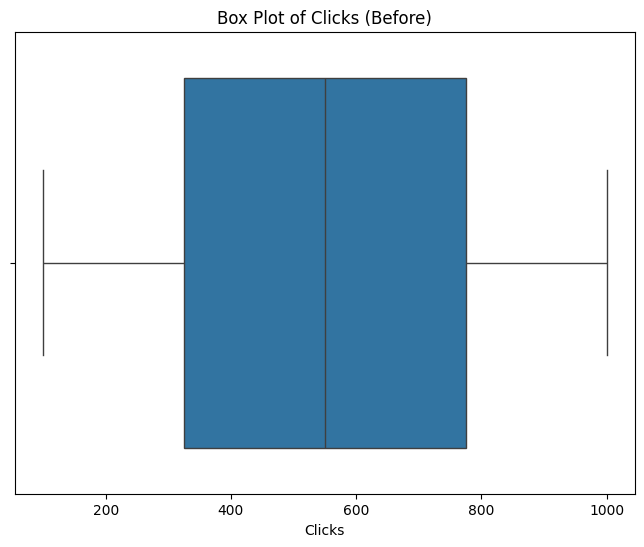

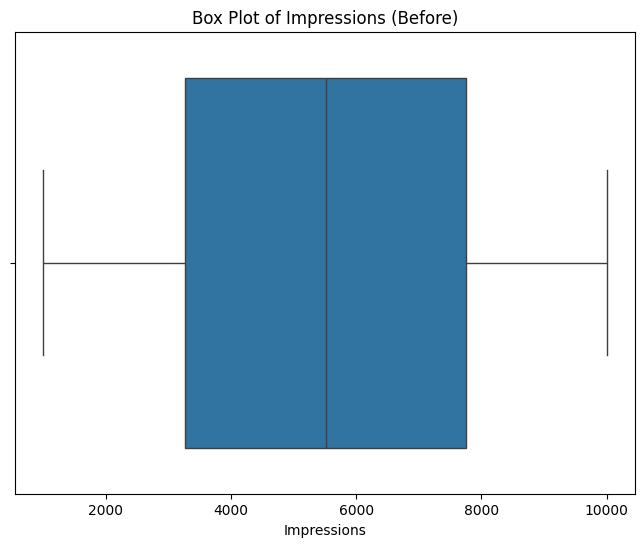

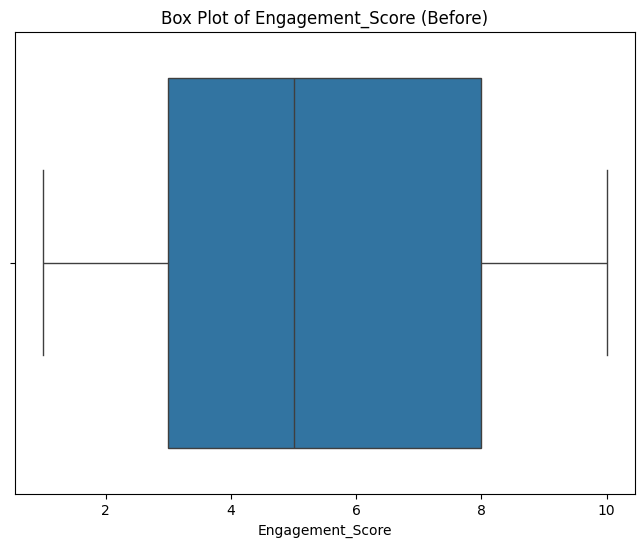

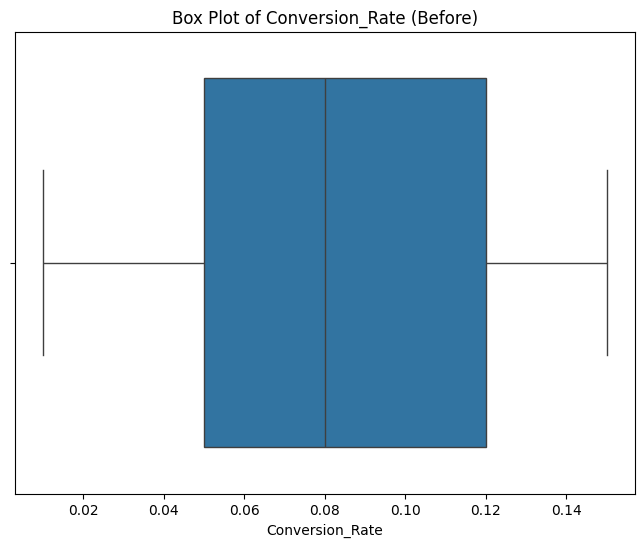

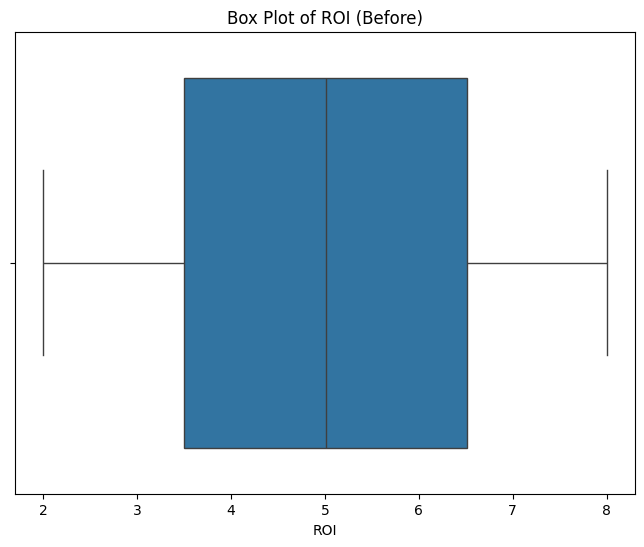

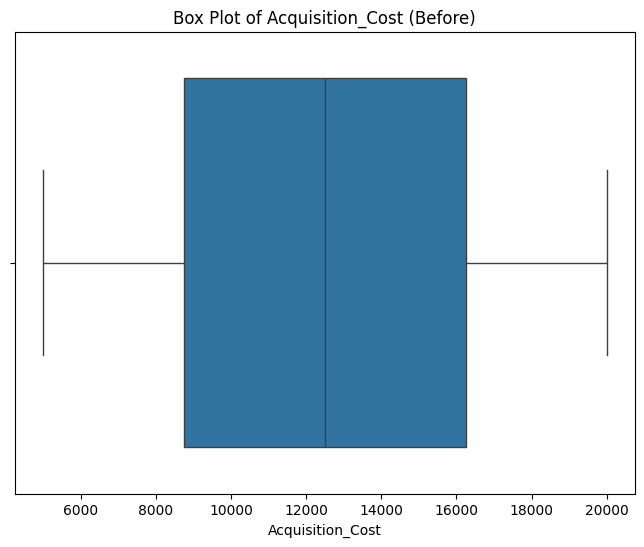

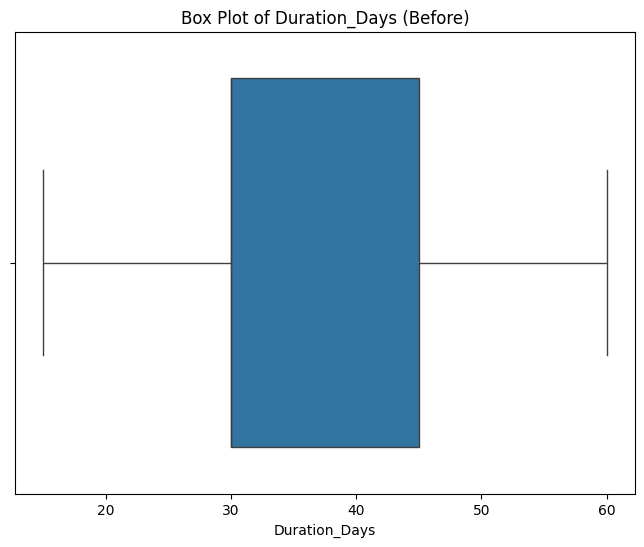

In [18]:
# List of numeric columns
numeric_columns = ['Clicks', 'Impressions', 'Engagement_Score', 'Conversion_Rate', 'ROI', 'Acquisition_Cost', 'Duration_Days']

# Before handling outliers
for col in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=marketing_data[col])
    plt.title(f'Box Plot of {col} (Before)')
    plt.show()

In [19]:
# Before handling outliers
print("Descriptive Statistics Before:")
print(marketing_data[numeric_columns].describe())

Descriptive Statistics Before:
              Clicks    Impressions  Engagement_Score  Conversion_Rate  \
count  199999.000000  199999.000000     199999.000000    199999.000000   
mean      549.774279    5507.322397          5.494727         0.080069   
std       260.017761    2596.853995          2.872578         0.040602   
min       100.000000    1000.000000          1.000000         0.010000   
25%       325.000000    3266.000000          3.000000         0.050000   
50%       550.000000    5518.000000          5.000000         0.080000   
75%       775.000000    7753.000000          8.000000         0.120000   
max      1000.000000   10000.000000         10.000000         0.150000   

                 ROI  Acquisition_Cost  Duration_Days  
count  199999.000000     199999.000000  199999.000000  
mean        5.002443      12504.427662      37.504088  
std         1.734491       4337.647755      16.746686  
min         2.000000       5000.000000      15.000000  
25%         3.500000  

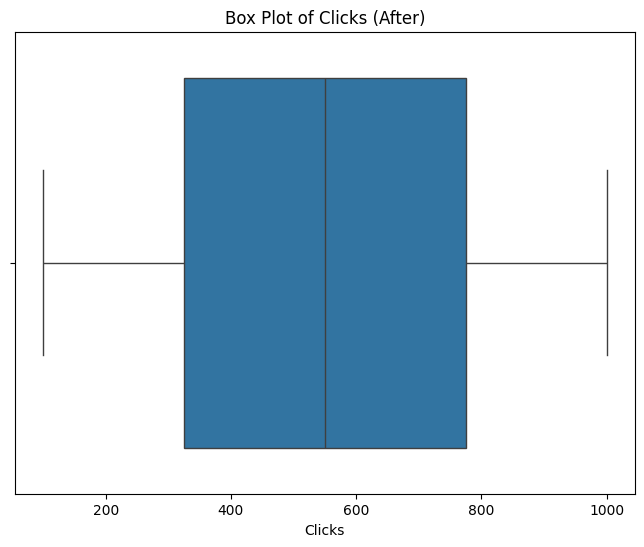

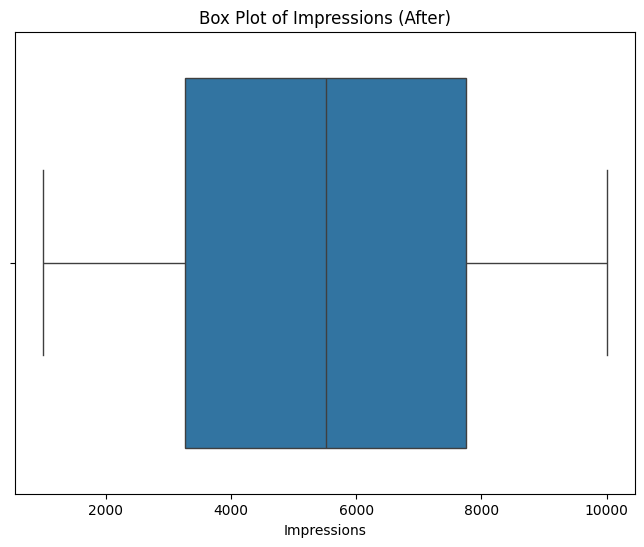

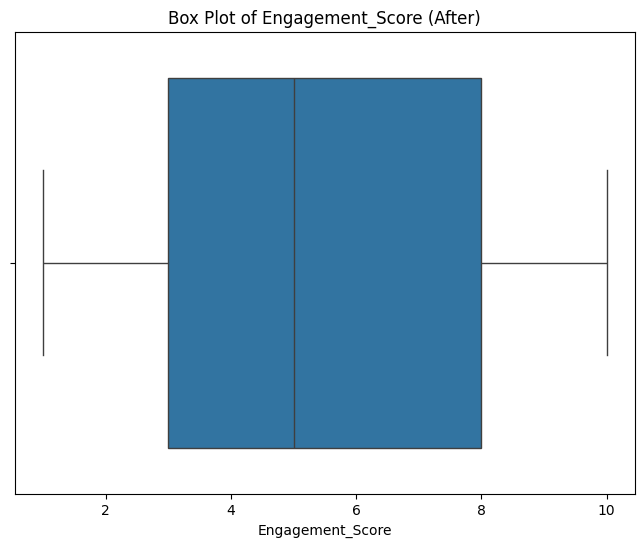

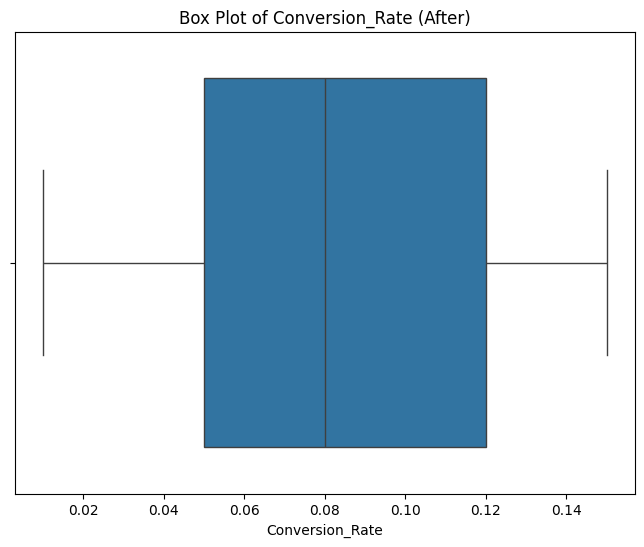

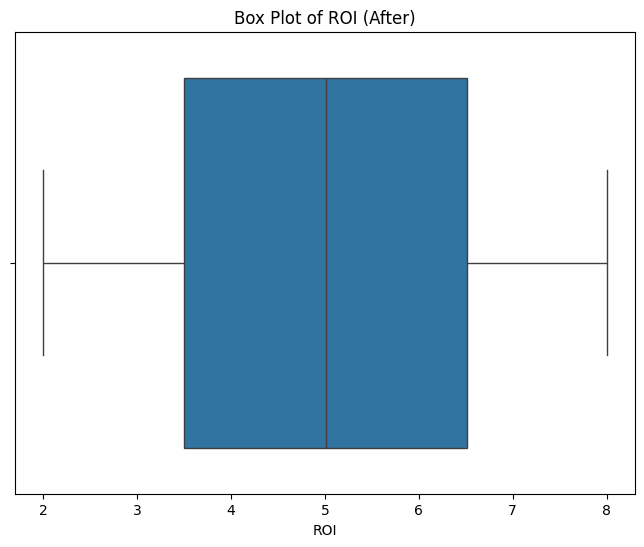

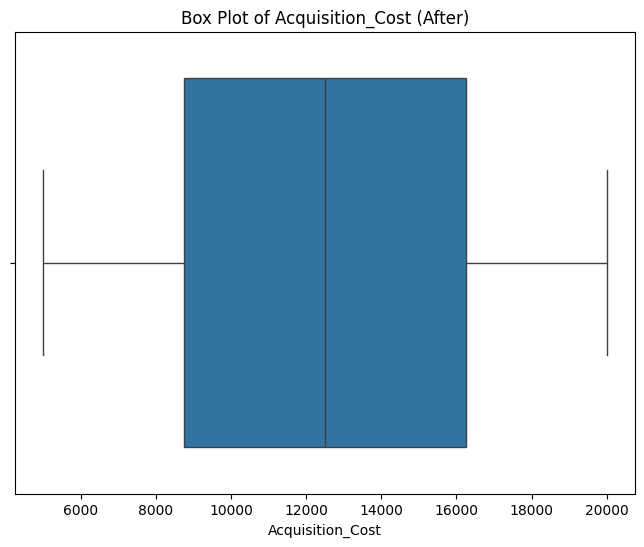

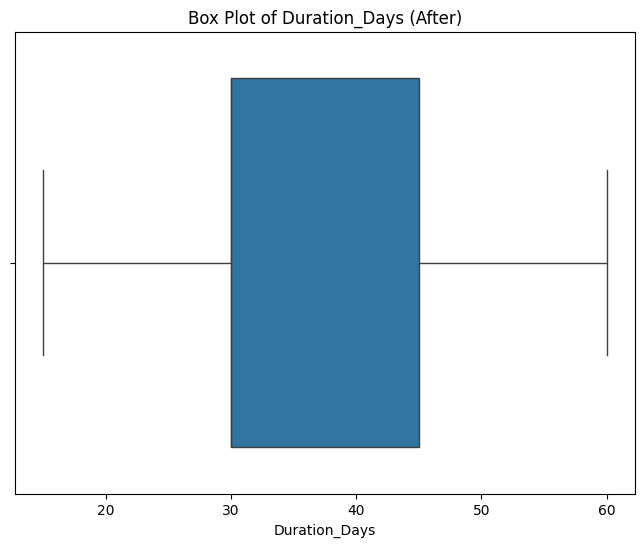

In [20]:
# Function to handle the outliers in my df
def handle_outliers(df, column):
  """
  Detect and handle the outliers in the numeric columns using the IQR method.
  """

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Replace outliers with winsorization
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  return df

# Loop through numeric columns and handle outliers
for col in numeric_columns:
    marketing_data = handle_outliers(marketing_data, col)

# After handling outliers
for col in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=marketing_data[col])
    plt.title(f'Box Plot of {col} (After)')
    plt.show()


In [21]:
# After handling outliers
print("\nDescriptive Statistics After:")
print(marketing_data[numeric_columns].describe())


Descriptive Statistics After:
              Clicks    Impressions  Engagement_Score  Conversion_Rate  \
count  199999.000000  199999.000000     199999.000000    199999.000000   
mean      549.774279    5507.322397          5.494727         0.080069   
std       260.017761    2596.853995          2.872578         0.040602   
min       100.000000    1000.000000          1.000000         0.010000   
25%       325.000000    3266.000000          3.000000         0.050000   
50%       550.000000    5518.000000          5.000000         0.080000   
75%       775.000000    7753.000000          8.000000         0.120000   
max      1000.000000   10000.000000         10.000000         0.150000   

                 ROI  Acquisition_Cost  Duration_Days  
count  199999.000000     199999.000000  199999.000000  
mean        5.002443      12504.427662      37.504088  
std         1.734491       4337.647755      16.746686  
min         2.000000       5000.000000      15.000000  
25%         3.500000  

- Outlier Analysis: We examined the distribution of numeric variables using box plots and descriptive statistics. No significant outliers were detected, suggesting that the data points are within an expected range. Therefore, we proceeded with further analysis without applying outlier handling techniques.

### EDA

In [22]:
average_engagement_table = marketing_data.groupby('Campaign_Type')['Engagement_Score'].mean().reset_index()
average_engagement_table

,Campaign_Type,Engagement_Score
0,Display,5.505889
1,Email,5.499624
2,Influencer,5.483220
3,Search,5.487138
4,Social Media,5.497878


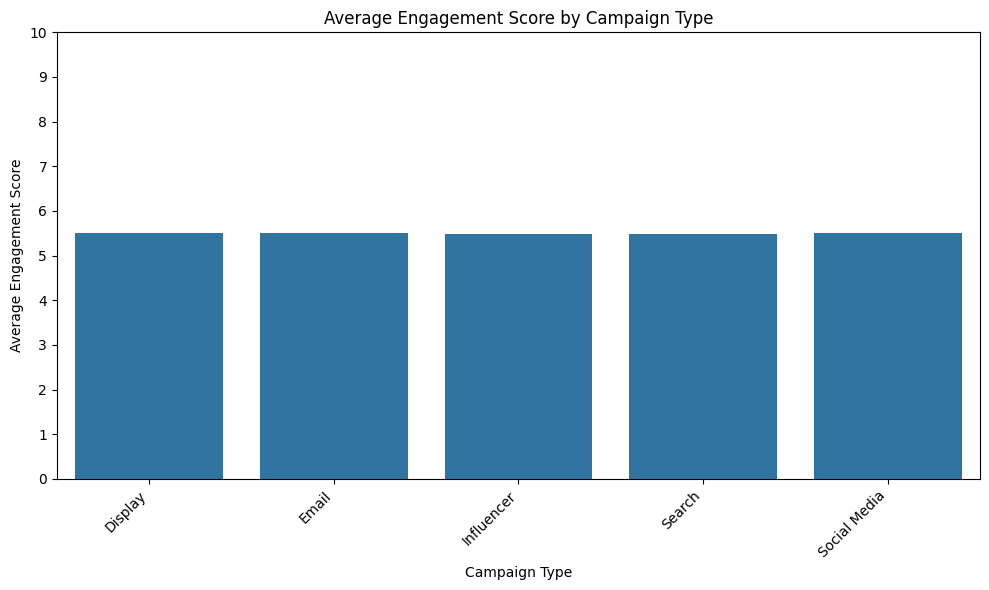

In [23]:
# Calculate the average engagement score for each campaign type
average_engagement = marketing_data.groupby('Campaign_Type')['Engagement_Score'].mean().reset_index()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign_Type', y='Engagement_Score', data=average_engagement)
plt.xlabel('Campaign Type')
plt.ylabel('Average Engagement Score')
plt.title('Average Engagement Score by Campaign Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0,11))
plt.tight_layout()
plt.show()